In [37]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from torch.utils.data import TensorDataset
from torch.autograd import Variable
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.ticker as ticker
from matplotlib.patches import Wedge
import numpy as np

In [195]:
batch_size = 32
lr = 0.01
epochs = 1500

In [196]:
train_data_file = './data/V_data_5domain.csv'
sigma_data_file = './data/sigma_data_5domain.xlsx'

train_data = pd.read_csv(train_data_file, header=None)
sigma_data = pd.read_excel(sigma_data_file, header=None)

train_data = torch.FloatTensor(train_data.values)
train_data = train_data.transpose(0,1)
sigma_data = torch.FloatTensor(sigma_data.values)
sigma_data = sigma_data.transpose(0,1)



#dataset = TensorDataset(train_data_tensor,sigma_data_tensor)
#train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [197]:
df = pd.DataFrame(train_data.numpy())
lb = pd.DataFrame(sigma_data.numpy())

train_data, test_data, train_labels, test_labels = train_test_split(df.values, lb.values, test_size=0.2, random_state=42)
test_data = torch.FloatTensor(test_data)
test_labels = torch.FloatTensor(test_labels)
train_data = torch.FloatTensor(train_data)
train_labels = torch.FloatTensor(train_labels)


train_dataset = TensorDataset(train_data, train_labels)
test_dataset = TensorDataset(test_data, test_labels)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

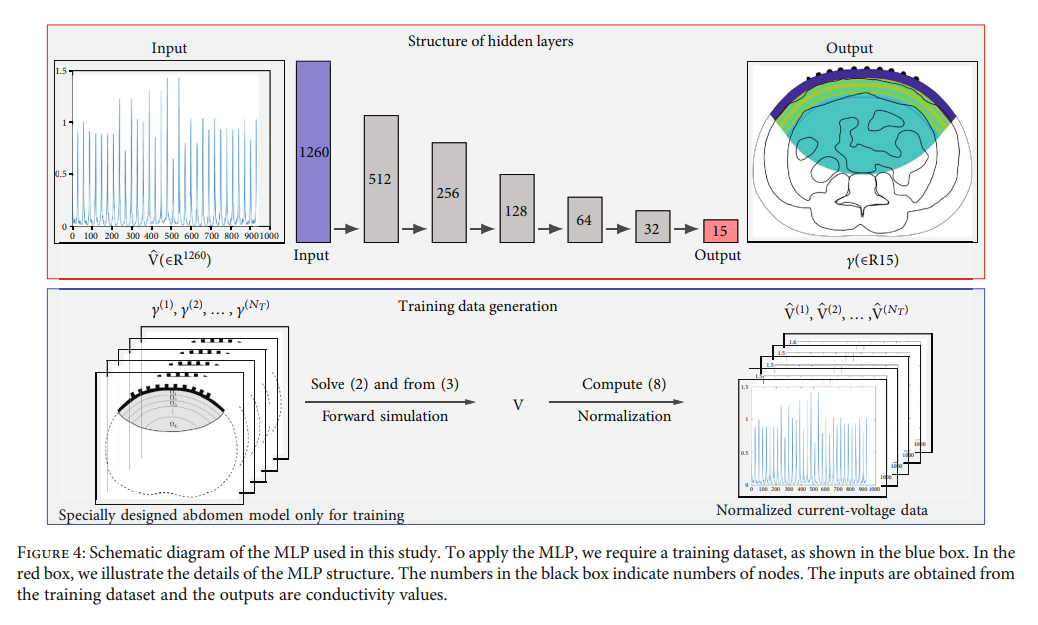

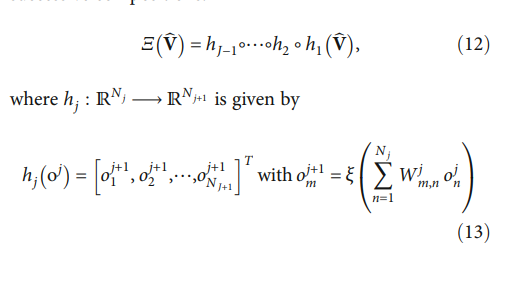

In [198]:
class FCN(nn.Module):
    def __init__(self):
        super(FCN, self).__init__()
        self.fc1 = nn.Linear(420, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 16)
        self.fc6 = nn.Linear(16, 6)  # 6개의 클래스에 대한 출력

    def forward(self, x):

        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.fc6(x)

        return x.squeeze(1)

In [199]:
model = FCN()

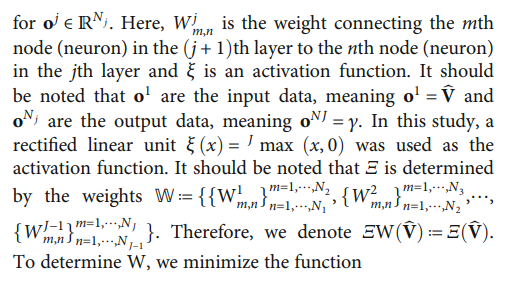

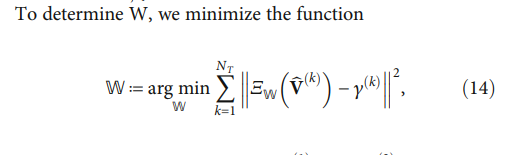

In [200]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [201]:
def train(epoch):
    model.train()
    train_loss = []
    for data, target in train_loader:
        data, target = Variable(data), Variable(target)
        output = model(data)
        loss = criterion(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())
    return sum(train_loss)/len(train_loss)

In [202]:
train_loss = list()
for epoch in range(1,epochs+1):
    train_loss.append(train(epoch))
    if epoch % 10 == 0:
        print("loss : {}".format(train_loss[epoch-1]))

loss : 3.0569695941472457
loss : 2.3387439311560936
loss : 2.2761009749719654
loss : 2.023489404532869
loss : 1.9724777229761674
loss : 1.5449788378456892
loss : 1.5131848545397741
loss : 1.5282494920795247
loss : 1.4231415077791376
loss : 1.3031403422355652
loss : 1.2233380796545643
loss : 1.190495593062902
loss : 1.1425911966016737
loss : 1.1261635250964408
loss : 1.1193025667788619
loss : 1.0343832302901705
loss : 1.014434259826854
loss : 1.005494283417524
loss : 1.1551663572505368
loss : 0.9471147242238966
loss : 0.9544571335032835
loss : 0.8589313176728911
loss : 0.897769766338801
loss : 0.9288995659957497
loss : 0.8948222605858819
loss : 0.793707349542844
loss : 0.9681983539613627
loss : 0.7588033282150657
loss : 0.8643787089040724
loss : 0.741872964774148
loss : 0.7833146680209596
loss : 0.9310316625287978
loss : 0.83931929226649
loss : 0.7930115436093282
loss : 0.76754838632325
loss : 0.8139879390344782
loss : 0.7239289369623539
loss : 0.8714510419611203
loss : 0.86102725136078

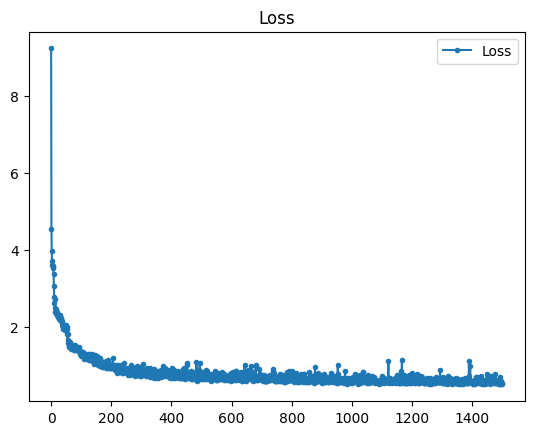

In [203]:
plt.figure()
plt.title("Loss")
plt.plot(train_loss, marker='.', label="Loss")
plt.legend()
plt.show()

In [204]:
model.eval()

test_data = torch.FloatTensor(test_data)
test_labels = torch.FloatTensor(test_labels)
output = model(test_data)
pred = output.data
print(pred)

tensor([[1.6124, 8.8335, 4.0570, 3.7666, 3.6300, 3.3083],
        [1.4938, 1.9440, 1.8628, 7.7414, 8.7195, 8.3687],
        [1.4912, 1.7185, 2.1024, 8.0067, 6.8776, 4.9681],
        ...,
        [1.5288, 4.4154, 4.8345, 5.0439, 5.2178, 5.2676],
        [1.4865, 1.8216, 1.5574, 3.3853, 5.1574, 6.0035],
        [1.4550, 0.9170, 9.8563, 9.9271, 9.4037, 9.4534]])


In [205]:
pred.size()

torch.Size([468, 6])

In [206]:
test_labels.size()

torch.Size([468, 6])

In [207]:
pred - test_labels

tensor([[-0.3876, -0.4998,  0.5570,  0.2666,  0.1300, -0.1917],
        [-0.5062, -0.0560, -0.1372,  1.0747,  0.2195, -0.1313],
        [-0.5088, -0.2815,  0.1024,  0.0067,  1.3776, -0.5319],
        ...,
        [ 0.5288, -0.2513,  0.1678,  0.3772, -0.2822, -0.2324],
        [-0.5135, -0.1784, -0.4426,  1.3853, -3.5093,  1.5035],
        [ 0.4550, -0.0830,  0.5229,  0.4271, -0.0963, -0.0466]])

In [208]:
threshold = 1.0  # 미세한 오차를 정의
pred = torch.round(pred*100)/100

# 예측값과 정답값 간의 차이 계산
difference = torch.abs(pred - test_labels)

# 각 행에 대해 모든 원소가 미세한 오차 이하인지 확인
all_close = torch.all(difference < threshold, dim=1)

# 일치하는 총 횟수 계산
total_matches = torch.sum(all_close).item()

# 전체 행 수
total_samples = test_labels.size(0)

# 정확도 계산
accuracy = total_matches / total_samples
print('Accuracy on the test set: {:.2%}'.format(accuracy))


Accuracy on the test set: 54.06%


In [209]:
all_close

tensor([ True, False, False,  True,  True, False, False,  True,  True, False,
        False, False, False, False,  True, False,  True,  True,  True, False,
         True,  True, False, False,  True,  True, False, False,  True,  True,
         True, False,  True, False, False, False, False, False, False,  True,
         True, False, False, False,  True, False, False,  True, False,  True,
         True,  True, False, False,  True,  True,  True,  True,  True,  True,
         True, False, False, False, False, False,  True, False,  True, False,
         True,  True,  True, False, False,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True, False,  True,  True,  True,
         True, False,  True,  True,  True, False,  True, False, False,  True,
        False, False, False, False, False,  True, False, False, False, False,
         True,  True,  True,  True,  True,  True,  True, False,  True, False,
        False,  True,  True,  True, False, False, False, False, 

In [210]:
all_close.size()

torch.Size([468])

In [211]:
difference

tensor([[0.3900, 0.5033, 0.5600, 0.2700, 0.1300, 0.1900],
        [0.5100, 0.0600, 0.1400, 1.0733, 0.2200, 0.1300],
        [0.5100, 0.2800, 0.1000, 0.0100, 1.3800, 0.5300],
        ...,
        [0.5300, 0.2467, 0.1633, 0.3733, 0.2800, 0.2300],
        [0.5100, 0.1800, 0.4400, 1.3900, 3.5067, 1.5000],
        [0.4600, 0.0800, 0.5267, 0.4300, 0.1000, 0.0500]])

In [212]:
difference.size()

torch.Size([468, 6])

In [213]:
colors = ["#CC33FF", "#66FFCC", "#33CCCC", "#006633", "#0099FF","#FF9900"]

In [214]:
true_tensor = torch.nonzero(all_close).squeeze()

In [215]:
true_tensor

tensor([  0,   3,   4,   7,   8,  14,  16,  17,  18,  20,  21,  24,  25,  28,
         29,  30,  32,  39,  40,  44,  47,  49,  50,  51,  54,  55,  56,  57,
         58,  59,  60,  66,  68,  70,  71,  72,  75,  76,  77,  78,  79,  81,
         82,  83,  84,  85,  87,  88,  89,  90,  92,  93,  94,  96,  99, 105,
        110, 111, 112, 113, 114, 115, 116, 118, 121, 122, 123, 128, 129, 130,
        131, 132, 135, 136, 137, 138, 140, 143, 144, 145, 150, 151, 153, 154,
        155, 156, 160, 161, 162, 163, 164, 168, 169, 171, 172, 174, 175, 176,
        180, 183, 185, 186, 190, 194, 195, 196, 197, 200, 201, 202, 203, 204,
        206, 207, 213, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226, 227,
        228, 230, 232, 233, 235, 237, 245, 246, 247, 253, 254, 255, 256, 257,
        258, 259, 261, 267, 268, 269, 270, 273, 276, 280, 282, 285, 286, 287,
        288, 289, 291, 292, 294, 295, 300, 303, 304, 305, 307, 308, 310, 311,
        313, 314, 317, 318, 321, 322, 323, 325, 329, 332, 334, 3

In [216]:
true_tensor.size()

torch.Size([253])

In [237]:
example_index = true_tensor[torch.randint(true_tensor.size(0), size=(1,))]
example_index = example_index.numpy()
example_tensor = pred[example_index]
example_array = example_tensor.numpy()
example_array = np.round(example_array, decimals=1)
example_array = np.transpose(example_array)

In [238]:
example_tensor

tensor([[1.5600, 6.1200, 5.8100, 6.9500, 7.7000, 8.0500]])

In [239]:
example_array

array([[1.6],
       [6.1],
       [5.8],
       [7. ],
       [7.7],
       [8. ]], dtype=float32)

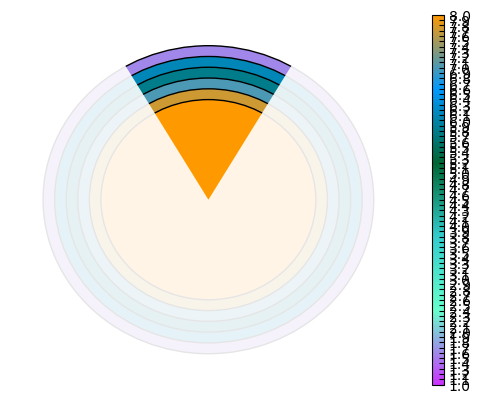

In [240]:
max_val = np.max(example_array)
fig, ax = plt.subplots()
positions = np.linspace(0,1,len(colors))
cmap = plt.cm.colors.LinearSegmentedColormap.from_list('custom_colormap',list(zip(positions,colors)))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = 1, vmax = max_val))
sm.set_array([])
cbar = plt.colorbar(sm, ticks=np.arange(1,max_val+0.1, 0.1), orientation='vertical', aspect=30,ax=ax)
cbar.ax.tick_params(direction='in')

center = (5,5)
radius = example_array.shape[0]

for i, item in enumerate(example_array):

  circle = plt.Circle(center, radius - (i*0.35) - 1, facecolor=sm.to_rgba(item), edgecolor='black')
  ax.add_artist(circle)

start_angle = 120
end_angle = 60
color = ['white']
size = [270]
wedge = Wedge(center, radius-1+0.1, start_angle, end_angle, facecolor='white', alpha = 0.9)
ax.add_artist(wedge)

x_min = min(center[0] - radius, center[0] - radius)
x_max = max(center[0] + radius, center[0] + radius)
y_min = min(center[1] - radius, center[1] - radius)
y_max = max(center[1] + radius, center[1] + radius)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

ax.set_axis_off()

plt.show()